# Example 3: hexagonal camemberts

This is a more advanced test, where we attempt reproducing Lara's results with hexagonal Camembert aggregates.
Camembert aggregates have size limitation from the presence of topological defect line inside of the aggregate,
which result from a particular design of the interaction matrix

In [1]:
import config as cfg
from json_dump import make_json_file
from designs.triangular import gen_vortex_camembert_contacts

In [2]:
import numpy as np
from json_dump import *
import contact_utils as cu

### Key parameter: how we will name this run
run_name = "03_camembert"

### Define model parameters

model_params = {}

In [3]:
# ---------- LATTICE OPTIONS ----------

# Options:
# "chain", "square", "triangular", "cubic", "bcc", "fcc"
model_params["lattice_name"] = "triangular"

# Lattice dimensions
model_params["lx"] = 40
model_params["ly"] = 40  # Has to be 1 for chain
model_params["lz"] = 1  # Has to be 1 for square & triangular

In [4]:
# ---------- MODEL PARAMETERS ----------

# Number of particle types
model_params["n_types"] = 1

# Number of particles of each type
model_params["n_particles"] = [400]

# Parameters I got from the draft of Lara's paper
e_crystal = -18.7
e_defect = 1/0.55 * e_crystal
e_repel = 10

cmap = gen_vortex_camembert_contacts(e_crystal, e_defect, e_repel)

# I even made a specific function for these couplings!
model_params["couplings"] = cmap.get_formatted_couplings()

# Initialization option
model_params["initialize_option"] = "random"

# If "initialize_option" is set to "from_file", we must specify the location of
# the input file
# model_params["state_input"] = str(cfg.structures_path/"final_structure.dat")

In [5]:
# Options for average collection
from pathlib import Path
data_path = Path("./data")

model_params["state_av_option"] = False
model_params["e_av_option"] = True
model_params["e_record_option"] = False

if model_params["state_av_option"]:
    state_path = data_path/run_name/"average_state"
    state_path.mkdir(parents = True, exist_ok = True)
    model_params["state_av_output"] =  str(state_path.resolve()) + "/"

if model_params["e_av_option"]:
    energy_path = data_path/run_name/"energy_moment"
    energy_path.mkdir(parents = True, exist_ok = True)
    model_params["e_av_output"] = str(energy_path.resolve())  + "/"

In [6]:
# Pick the probabilities of different moves
# Options:
""""
    "swap_empty_full",
    "swap_full_full",
    "rotate",
    "mutate",
    "rotate_and_swap_w_empty"
"""

moves_dict = {}
moves_dict["swap_empty_full"] = 1/4
moves_dict["rotate"] = 1/4
moves_dict["rotate_and_swap_w_empty"] = 1/4
moves_dict["swap_full_full"] = 1/4

model_params["move_probas"] = moves_dict

print(cfg.input_path)
make_json_file(model_params, cfg.input_path/"model_params.json")

/Users/vincent/research/projects/23_frustratedSelfAssembly/camemberts3D/simulations/250121_cubicCamembertsElegant_test/frusa_lattice_mc/input


In [7]:
### Define mc parameters

mc_params = {}

# Number of MC steps used for equilibration
mc_params["mcs_eq"] = 1500

# Number of MC steps used for averaging
mc_params["mcs_av"] = 1000

# Type of cooling schedule
# if exponential chosen: specify log10(T) as initial and final temperatures
mc_params["cooling_schedule"] = "exponential"

# Initial annealing temperature
mc_params["Ti"] = 0

# Final annealing temperature
mc_params["Tf"] = 1

# Number of annealing steps
mc_params["Nt"] = 20

# Type of cooling schedule
# if exponential chosen: specify log10(T) as initial and final temperatures
mc_params["cooling_schedule"] = "inverse"

# Option to collect state checkpoints at the end of each temperature cycle
mc_params["checkpoint_option"] = True

# If checkpoint is True, we need to provide the output address for the 
# checkpoint files
structures_path = data_path/run_name/"structures"
structures_path.mkdir(parents = True, exist_ok = True)

if mc_params["checkpoint_option"]:
    mc_params["checkpoint_address"] = str(structures_path.resolve())+"/"

# Output location of the final state configuration (must end with "/")
mc_params["final_structure_address"] = str(structures_path.resolve())+"/"

make_json_file(mc_params, cfg.input_path/"mc_params.json")

In [8]:
# Run the simulation

cfg.run_simulation(overwrite=True)

At least one of the output folders is already populated!
overwrite flag set to True: running anyway.
Program runs!
Got here1600
Printing current system state
Number of particle types: 1
Number of particles of each type: {400, }
Printing interactions structure
Printing coupling matrix: {10, 10, 10, -18.7, -34, 10, 10, 10, 10, 10, -18.7, -34, 10, 10, 10, 10, 10, -18.7, -18.7, 10, 10, 10, 10, 10, -34, -18.7, 10, 10, 10, 10, 10, -34, -18.7, 10, 10, 10, }
System energy is: 96.9
All mc parameters loaded successfully
---------------------------------------------
      Monte-Carlo simulation parameters
---------------------------------------------

Number of equilibration steps mcs_eq = 1500
Number of averaging steps mcs_av = 1000

Initial temperature Ti = 0
Final temperature Tf = 1
Number of temperature steps Nt = 20

The selected cooling schedule is inverse

Output location for checkpoints: /Users/vincent/research/projects/23_frustratedSelfAssembly/camemberts3D/simulations/250121_cubicCamemb

## Visualization

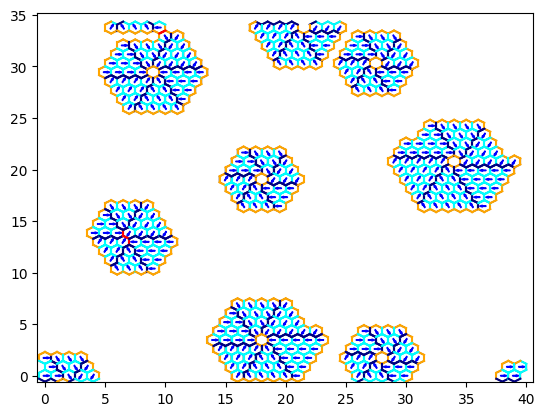

In [10]:
import matplotlib.pyplot as plt
import plotting.plot_tri as pt
import config as cfg
from designs.triangular import get_vortex_camembert_colormap

pr = pt.ParticleRepresentation.from_model_file(cfg.input_path/"model_params.json")
fig, ax = pr.plot_results_arrows(results_folder=structures_path, squared=True)
# This is a special routine to plot the contacts between particles in a Camembert aggregate.
pr.plot_contacts(ax, get_vortex_camembert_colormap(), results_folder=structures_path, squared = True)
fig.savefig("figures/test_camembert.svg")